# Check data from hubs

Testing the 29 limit proximity scans

Badges -
 32 badges with older version
One badge with new version
5 beacons (with old version, doesn’t matter)

I started the hub, activated the badges, then marke all old version badges as active and restarted the hub (so that there is no issue with pulling data)


Had some issues with other badges around. Had to restart the whole thing and change the project id to 13

tests:
 ~14:16- - 32 badges, 5 beacons, all very close. Expecting to see at least 4 beacons in a scan
~14:22  - 32 badges very close, 5 beacons further away. Expecting to see only 4
~14:24 ~ - moved them even further away. Expecting to see only 4
~14:27~ - Only 2 beacons very close, 3 are turned off. Expecing to see 2
~14:30~ - turn off all



The badge that was used for the data itself:
FA:6F:8C:0C:39:0D, E92D598WEX



In [1]:
#import sys
#!{sys.executable} -m pip install sklearn

In [10]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np

import pytz
import gzip
import os

# Import the data analysis tools
import openbadge_analysis as ob
import openbadge_analysis.preprocessing

In [19]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

In [5]:
# Settings
time_zone = 'US/Eastern' # Your local timezone
hublog_time_zone = 'UTC'
log_version = '2.0'
time_bins_size = '15S' # For proximity scans

folder = '../data/raw/20181121_test_fw3_proximity/'
proximity_filename = folder+'proximity_archive.txt.gz'
audio_filename = folder+'audio_archive.txt.gz'
hublog_filename = folder+'hub.log.gz'

# Load data

In [11]:
with gzip.open(proximity_filename, 'r') as f:
    m2badge = ob.preprocessing.member_to_badge_proximity(f, time_bins_size, tz=time_zone)

In [12]:
m2badge = m2badge.reset_index()

In [13]:
m2badge.head()

,datetime,member,observed_id,rssi,count
0,2018-11-21 14:15:45-05:00,E92D598WEX,3,-59.0,3.0
1,2018-11-21 14:15:45-05:00,E92D598WEX,4,-67.0,4.0
2,2018-11-21 14:15:45-05:00,E92D598WEX,5,-68.0,2.0
3,2018-11-21 14:15:45-05:00,E92D598WEX,6,-64.0,3.0
4,2018-11-21 14:15:45-05:00,E92D598WEX,8,-56.0,2.0


# Calc data

In [14]:
m2badge['is_beacon'] = m2badge.apply(lambda row: 1 if row.observed_id >= 16000 else 0  ,axis=1)

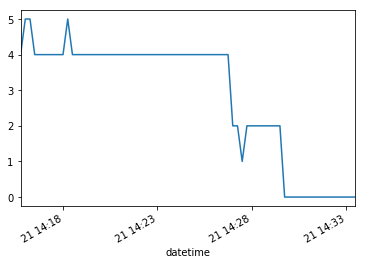

In [22]:
m2badge.groupby('datetime')['is_beacon'].sum().plot()

# plot number of beacons and RSSIs

/home/orenled/.virtualenvs/openbadge-analysis-test-badge/local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


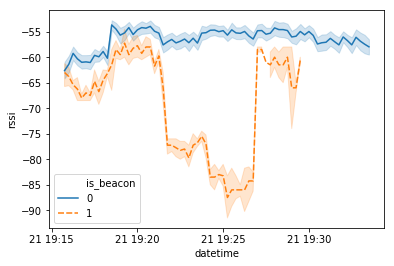

In [35]:
#rssi_means = m2badge.groupby(['datetime','is_beacon'])[['rssi']].mean()
#rssi_means
#ax = sns.lineplot(rssi_means)
ax = sns.lineplot(x="datetime", y="rssi",
    hue="is_beacon", style="is_beacon", data=m2badge)